In [1]:
import os
import watershed_udder as wu
import numpy as np
import pandas as pd
from skimage.measure import label, regionprops, regionprops_table
from skimage import measure
import json
import matplotlib.pyplot as plt

C:\Users\marie\miniconda3\envs\napari-env2\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [2]:
def prop_circularity(area, perimeter):
    circularity = (4*np.pi*area)/(perimeter**2)
    return circularity

In [5]:
# dirpath = os.getcwd()
dirpath = os.getcwd()
ws_dir = os.path.join("validate_watershed", "watershed_segments")
corr_dir = os.path.join("validate_watershed", "watershed_correspondence")
label_dir = os.path.join(dirpath, "validate_watershed", "pred_labels")
kp_dir = os.path.join(label_dir, "keypoints")
sg_dir = os.path.join(label_dir, "segments")
img_dir = os.path.join(os.path.normpath(dirpath + os.sep + os.pardir), "udder_video", "depth_images")
results = pd.read_csv(os.path.join("validate_watershed", "ws_class_predictions_I.csv"))
out_path = os.path.join(dirpath, "features_dict")
good = results[results.thr09 == 1]

lf
rf
lb
rb


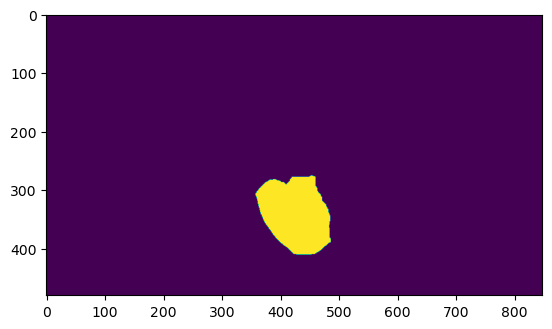

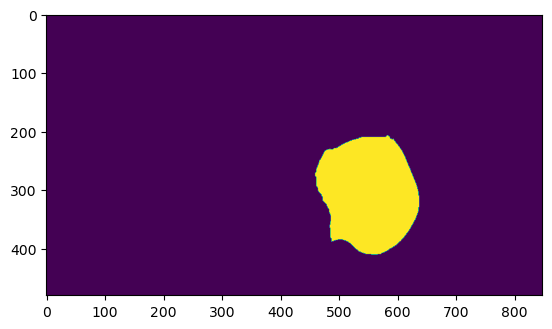

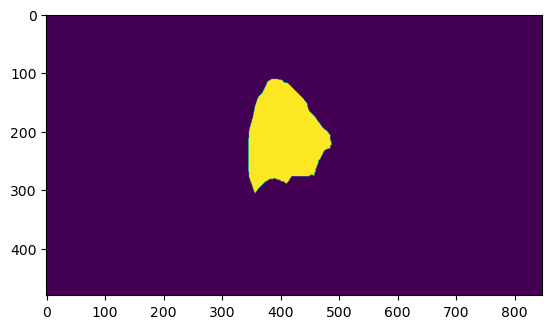

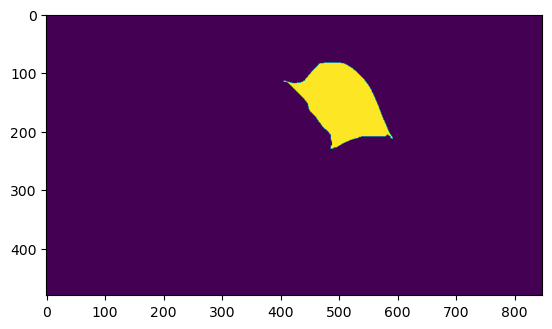

In [4]:
cnt = 0
for file in good.filename:
    print(cnt)
    cnt+=1
    shape_dict = {}
    udder = wu.udder_object(file + ".tif", img_dir, label_dir, array = 0)
    img = udder.img
    ws_label = np.load(os.path.join(ws_dir, file + ".npy"))
    kp_ws = pd.read_csv(os.path.join(corr_dir, file +".csv")).loc[0].to_dict()
    new_kp, kp_ws = wu.update_kp(kp_ws, ws_label, img)
    ws_map = dict((v, k) for k, v in kp_ws.items())
    
    udd_mask = udder.get_mask()
    labels = measure.label(udd_mask)
    props = measure.regionprops(labels, img)
    udd_peri = getattr(props[0], 'perimeter')
    udd_area = getattr(props[0], 'area')
    udd_ecc = getattr(props[0], 'eccentricity')
    udd_circ = prop_circularity(udd_area, udd_peri)
    
    shape_dict['udder'] = {'circ': udd_circ, 'exc': udd_ecc, 'peri':udd_peri, 'area': udd_area}
    
    mask0 = np.zeros(udder.size)
    quarters_dict = {}
    for key in kp_ws.keys():
        label = kp_ws[key]
        quarter_mask = mask0.copy()
        rows, cols = np.where(ws_label == label)
        quarter_mask[rows, cols] = 1
        labels = measure.label(quarter_mask)
        props = measure.regionprops(labels, img)
        qt_ecc = getattr(props[0], 'eccentricity')
        qt_area = getattr(props[0], 'area')
        qt_peri = getattr(props[0], 'perimeter')
        qt_circ = prop_circularity(qt_area,qt_peri)
        quarters_dict[key] = {'circ':qt_circ, 'exc':qt_ecc, 'peri':qt_peri, 'area':qt_area}
    
    shape_dict["quarters"] = quarters_dict

with open(os.path.join(out_path, "shape", file + ".json"), 'w') as f:
        json.dump(shape_dict_dict, f)

In [5]:
shape_dict

{'udder': {'circ': 0.7774627633854994,
  'exc': 0.5981666707772225,
  'peri': 1080.57272657703,
  'area': 72240.0},
 'quarers': {'lf': {'circ': 3.578877409162339e-05,
   'exc': 0.6680135714391214,
   'peri': 454.51681066681454,
   'area': 12633.0},
  'rf': {'circ': 1.1242367375472801e-05,
   'exc': 0.5632788157081077,
   'peri': 652.1919548795365,
   'area': 27000.0},
  'lb': {'circ': 2.225286593414224e-05,
   'exc': 0.6304229748918714,
   'peri': 576.428498912246,
   'area': 18042.0},
  'rb': {'circ': 3.526879699624335e-05,
   'exc': 0.7402920406608766,
   'peri': 555.0559159102155,
   'area': 14063.0}}}